<a href="https://colab.research.google.com/github/SylvainBallerini/test_technique_tictactrip/blob/main/Test_technique_Tictactrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
pip install plotly

In [100]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler


In [101]:
# Création des dataframes
data_cities = pd.read_csv("cities.csv")
data_providers = pd.read_csv('providers.csv')
data_stations = pd.read_csv("stations.csv")
data_ticket = pd.read_csv('ticket_data.csv')

In [102]:
data_cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [103]:
data_cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [104]:
data_providers.head(10)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
7,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
8,17,9,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
9,18,9,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus


In [105]:
data_stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [106]:
data_ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [107]:
data_ticket.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


## 1 ) Extraire les infos intéressantes type prix min, moyen et max, durée min/max/moyenne par trajet


In [108]:
# Création d'un dataframe avec le prix, les trajets et la durée
df_1 = data_ticket[['departure_ts', 'arrival_ts', 'price_in_cents', 'o_city', 'd_city']]
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,611,542
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,611,542
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,611,542
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,611,542


In [109]:
# Changement des IDs des villes par les noms  
df_1 = pd.merge(df_1, data_cities[['id','unique_name']], left_on="o_city", right_on='id')
df_1 = df_1.drop(["o_city","id"], axis=1)
df_1 = df_1.rename(columns={"unique_name": "o_city"})
df_1 = pd.merge(df_1, data_cities[['id','unique_name']], left_on="d_city", right_on='id')
df_1 = df_1.drop(["d_city","id"], axis=1)
df_1 = df_1.rename(columns={"unique_name": "d_city"})
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,orleans,montpellier
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,orleans,montpellier
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,orleans,montpellier
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,orleans,montpellier
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,orleans,montpellier


In [110]:
# Calul du temps de trajet en heures
# Convertion des colonnes departure_ts et arrival_ts en format date
df_1['departure_ts'] = pd.to_datetime(df_1['departure_ts'])
df_1['arrival_ts'] = pd.to_datetime(df_1['arrival_ts'])

# Création d'une fonction pour calculer le temps de trajet en heures

def time(departure, arrival):
  t = arrival - departure
  return int(t.total_seconds()/3600)
  
df_1['time'] = df_1.apply(lambda x: time(x['departure_ts'], x['arrival_ts']), axis=1)

In [111]:
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,time
0,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,orleans,montpellier,6
1,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,orleans,montpellier,17
2,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,orleans,montpellier,31
3,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,orleans,montpellier,21
4,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,orleans,montpellier,21


In [112]:
# On supprime les colonnes inutiles
df_1 = df_1.drop(['departure_ts','arrival_ts'], axis=1)


In [113]:
df_1.head()

,price_in_cents,o_city,d_city,time
0,4550,orleans,montpellier,6
1,1450,orleans,montpellier,17
2,7400,orleans,montpellier,31
3,13500,orleans,montpellier,21
4,7710,orleans,montpellier,21


In [114]:
# Vérification des données
df_1.describe()


,price_in_cents,time
count,74168.000000,74168.000000
mean,4382.711061,6.623396
std,3739.325367,9.919790
min,300.000000,0.000000
25%,1900.000000,3.000000
50%,3350.000000,4.000000
75%,5250.000000,8.000000
max,38550.000000,492.000000


Il semble avoir plusieurs données aberrantes 

In [115]:
fig = px.box(df_1, y='time')
fig.show()

Nous avons en effet des valeurs extrêmes

In [116]:
# Suppression des valeurs aberrantes supérieur à 24h
df_1 = df_1[df_1['time']<25]

In [117]:
# Analyse pour les prix
fig = px.box(df_1, y='price_in_cents')
fig.show()

In [118]:
# Vérification
df_1_bis = df_1[df_1['price_in_cents']>10000]
df_1_bis = df_1_bis.sort_values(by='price_in_cents', ascending=False)
df_1_bis.head(50)

,price_in_cents,o_city,d_city,time
58440,38550,london,bordeaux,6
26591,37550,london,marseille,8
26593,35150,london,marseille,7
48096,35100,bordeaux,london,15
48093,34700,bordeaux,london,4
48091,34700,bordeaux,london,4
48402,33900,liege,london,4
48400,33900,liege,london,4
26590,33550,london,marseille,8
26600,33550,london,marseille,7


Dans le cas des temps si cela sembler aberrant c'est beaucoup mois sûr pour les prix. Par précaution je préfêre laisser ainsi et remonter cette information au métier.

In [119]:
# Création d'un pivot table avec en index la ville de départ et celle d'arrivée 
df_pt_1 = pd.pivot_table(df_1, index=['o_city','d_city'],values=['price_in_cents','time'],aggfunc=[np.mean, np.max, np.min, len])
df_pt_1

mean  ...  len
                                         price_in_cents  ... time
o_city                d_city                             ...     
aeroport-paris-vatry- troyes                5300.000000  ...    1
agde                  amsterdam            20320.000000  ...    5
agen                  dijon                11755.000000  ...    2
                      marseille             4042.666667  ...   30
                      marseille-aeroport    3833.333333  ...    6
...                                                 ...  ...  ...
villefranche-sur-cher bordeaux              5981.111111  ...    9
vitre                 nice                 18495.000000  ...    2
zurich                dijon                 1872.500000  ...    4
                      liege                 4096.666667  ...    9
                      strasbourg            1590.000000  ...    5

[1399 rows x 8 columns]

Maintenant que j'ai un dataframe qui répond à la question je vais utiliser 
Streamlit pour visualiser les différents résultats de manière interactive.


Problèmatique : Distribution des prix et des temps de trajets

In [120]:
# Distribution des prix (en euros) de l'ensemble des trajets

df_1["price_in_euros"] = df_1["price_in_cents"].apply(lambda x : int(x/100))
df_1.head()

,price_in_cents,o_city,d_city,time,price_in_euros
0,4550,orleans,montpellier,6,45
1,1450,orleans,montpellier,17,14
3,13500,orleans,montpellier,21,135
4,7710,orleans,montpellier,21,77
5,5800,paris,montpellier,8,58


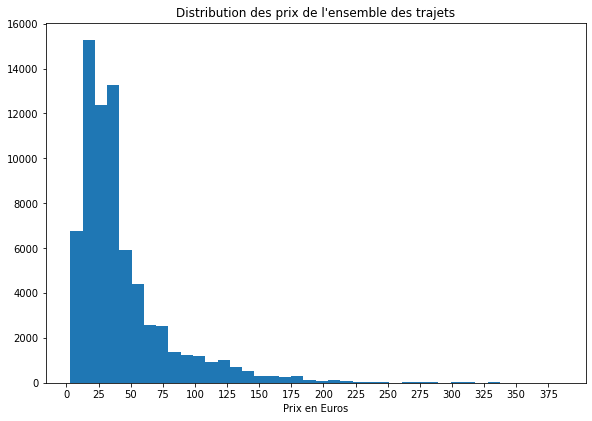

In [121]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_axes([0.25]*4)
ax.hist(df_1['price_in_euros'], 40)
ticks = [t for t in range(0,400,25)]
ax.set_xticks(ticks)
ax.set_title("Distribution des prix de l'ensemble des trajets")
ax.set_xlabel("Prix en Euros")
plt.show()

Problèmatique : Y a t'il une corrélation entre le temps de trajet et le prix ?

In [122]:
# Comparaion du prix et du temps de trajet
df_dv_1 = df_pt_1['mean'].sort_values(by=['price_in_cents'])
df_dv_1['price_in_euros'] = df_dv_1['price_in_cents'].apply( lambda x : int(x/100))
fig = px.line(df_dv_1, x="price_in_euros", y="time", title="Comparaison prix et temps de trajet")

fig.update_layout(
    yaxis_title = "Temps en Heures",
    xaxis_title = "Prix en euros"
)



fig.show()

Réponse : NON nous voyons clairement que nous sommes loin corrélation mais il faut prendre en compte qu'ici nous avons l'ensemble des moyens des transports.

## Streamlit (hors test)

In [123]:
df_pt_1.loc['agen']

mean             ...            len     
                   price_in_cents       time  ... price_in_cents time
d_city                                        ...                    
dijon                11755.000000  13.500000  ...              2    2
marseille             4042.666667   7.966667  ...             30   30
marseille-aeroport    3833.333333   5.666667  ...              6    6
paris                 2797.500000  11.750000  ...              4    4
toulouse               864.626866   1.049751  ...            201  201

[5 rows x 8 columns]

In [124]:
df_pt_1.loc['agen'].index


Index(['dijon', 'marseille', 'marseille-aeroport', 'paris', 'toulouse'], dtype='object', name='d_city')

In [125]:
df_f = df_pt_1.loc['agen'].loc['marseille']
df_f

mean  price_in_cents    4042.666667
      time                 7.966667
amax  price_in_cents    8920.000000
      time                12.000000
amin  price_in_cents    2000.000000
      time                 5.000000
len   price_in_cents      30.000000
      time                30.000000
Name: marseille, dtype: float64

In [126]:
str(df_f.loc['len'].loc['time'])

'30.0'

In [127]:
# récupération de la liste des villes d'origines
li_o_city = np.unique(df_1['o_city'])


# `2) Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)`

In [128]:
# Objectif d'un DF regroupant le prix, le moyen de transport et la distance

Calcul des distances entre les villes. Je vais utiliser la formule Haversine.

In [129]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return int(km)

In [130]:
df_2 = data_ticket[['departure_ts', 'arrival_ts', 'price_in_cents', 'o_city', 'd_city','company']]

In [131]:
# Création d'un DF regroupant le nom des villes, les longitudes et latitudes des villes
# ainsi que le prix et les temps de trajets

# Merge pour les villes d'origines (o_city)
df_2 = pd.merge(df_2, data_cities[['id','unique_name','latitude', 'longitude']], left_on="o_city", right_on='id')
df_2 = df_2.drop(["o_city","id"], axis=1)
df_2 = df_2.rename(columns={"unique_name": "o_city","latitude":"o_latitude","longitude":"o_longitude"})

# Merge pour les villes d'arrivées (d_city)
df_2 = pd.merge(df_2, data_cities[['id','unique_name','latitude', 'longitude']], left_on="d_city", right_on='id')
df_2 = df_2.drop(["d_city","id"], axis=1)
df_2 = df_2.rename(columns={"unique_name": "d_city","latitude":"d_latitude","longitude":"d_longitude"})

df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,8385,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,9,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,8381,orleans,47.907018,1.90627,montpellier,43.604452,3.918318


In [132]:
# Création d'une nouvelle colonne "distance" qui sera la distance en km entre chaque ville
# en utilisant la méthode Harversine

df_2['distance'] = df_2.apply(lambda x: haversine(x['o_longitude'], x['o_latitude'],x['d_longitude'], x['d_latitude']), axis=1)

In [133]:
df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude,distance
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,8385,orleans,47.907018,1.90627,montpellier,43.604452,3.918318,503
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,9,orleans,47.907018,1.90627,montpellier,43.604452,3.918318,503
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318,503
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318,503
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,8381,orleans,47.907018,1.90627,montpellier,43.604452,3.918318,503


In [134]:
# Vérification des valeurs avec le site https://fr.distance24.org/
# Récupération de 5 itinéraires différents

df_pt_2 = pd.pivot_table(df_2, index=['o_city','d_city'],values=['distance'],aggfunc=[np.mean])
df_pt_2

mean
                                         distance
o_city                d_city                     
aeroport-paris-vatry- troyes                   54
agde                  amsterdam              1013
agen                  dijon                   490
                      marseille               394
                      marseille-aeroport      379
...                                           ...
villefranche-sur-cher bordeaux                327
vitre                 nice                    818
zurich                dijon                   264
                      liege                   422
                      strasbourg              146

[1437 rows x 1 columns]

In [135]:
# Après vérification de plusieurs distances, la fonction haversine a bien fonctionné.
# 
# Création de la colonne du type de transport

df_2 = pd.merge(df_2, data_providers[['id','transport_type']], left_on="company", right_on='id')

In [136]:
df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude,distance,id,transport_type
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,8385,orleans,47.907018,1.906270,montpellier,43.604452,3.918318,503,8385,carpooling
1,2017-10-06 07:00:00+00,2017-10-06 15:00:00+00,5800,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling
2,2017-10-06 08:20:00+00,2017-10-06 16:20:00+00,5450,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling
3,2017-10-06 09:50:00+00,2017-10-06 17:30:00+00,5700,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling
4,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,4750,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling


In [137]:
df_2['distance'].max()

1870

Pas de distance supèrieur à 2000 km dans mon dataframe

In [138]:
# Création colonne label des distances en utilisant la méthode cut de pandas
# label des distances
label = ["0-200km", "201-800km", "800-2000km", "2000+km"]

# liste des points de coupe 
cut_points = [0,200,800,2000,10000]

df_2['label_distance'] = pd.cut(x=df_2['distance'], bins=cut_points, labels=label, include_lowest=False)

In [139]:
# distribution des labels
pd.value_counts(df_2['label_distance'])

201-800km     58489
0-200km       14112
800-2000km     1567
2000+km           0
Name: label_distance, dtype: int64

In [140]:
df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude,distance,id,transport_type,label_distance
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,8385,orleans,47.907018,1.906270,montpellier,43.604452,3.918318,503,8385,carpooling,201-800km
1,2017-10-06 07:00:00+00,2017-10-06 15:00:00+00,5800,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling,201-800km
2,2017-10-06 08:20:00+00,2017-10-06 16:20:00+00,5450,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling,201-800km
3,2017-10-06 09:50:00+00,2017-10-06 17:30:00+00,5700,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling,201-800km
4,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,4750,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,carpooling,201-800km


In [141]:
# Distribution des distances et types de transport

fig = px.histogram(df_2, x="distance", color="transport_type", title="Distribution des distances et type de transport",
                   labels={"distance":"Distance (KM)"})

fig.update_layout(
    yaxis_title = ""
)

fig.show()

In [142]:
df_2['transport_type'].unique()

array(['carpooling', 'bus', 'train'], dtype=object)

In [143]:
# Calul du temps de trajet en heur
# Convertion des colonnes departure_ts et arrival_ts en format date
df_2['departure_ts'] = pd.to_datetime(df_2['departure_ts'])
df_2['arrival_ts'] = pd.to_datetime(df_2['arrival_ts'])
df_2['time'] = df_2.apply(lambda x: time(x['departure_ts'], x['arrival_ts']), axis=1)

In [144]:
# Traduction des moyens de transports

def trad_transport(transport_type):
  dico = {"carpooling": 'Covoiturage', "bus":"Bus", "train":"Train"}
  return dico[transport_type]

df_2['transport_type'] = df_2['transport_type'].apply(trad_transport)

In [145]:
# Création d'un pivot table avec le type de transport, les labels de distance 

df_pt_3 = pd.pivot_table(df_2, index=['transport_type','label_distance'],values=['price_in_cents','time'],aggfunc=[np.mean])
df_pt_3

mean           
                              price_in_cents       time
transport_type label_distance                          
Bus            0-200km           2151.283308   9.748086
               201-800km         3505.838557  14.636467
               800-2000km        6949.950045  27.089010
Covoiturage    0-200km           1194.670862   1.549564
               201-800km         3231.199948   4.349554
               800-2000km        8626.545455  12.706294
Train          0-200km           3496.445880   3.930937
               201-800km         9136.398016   7.188283
               800-2000km       15463.746130  11.650155

Pour la réponse à la question je vais aussi utiliser Streamlit pour la visualisation



## BONUS : Prediction avec le Machine Learning
Estimation d'un prix d'un ticket

Utilisation du modèle de l'arbre de décision

In [146]:
from  sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

model = DecisionTreeRegressor()

In [147]:
df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude,distance,id,transport_type,label_distance,time
0,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,8385,orleans,47.907018,1.906270,montpellier,43.604452,3.918318,503,8385,Covoiturage,201-800km,6
1,2017-10-06 07:00:00+00:00,2017-10-06 15:00:00+00:00,5800,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,Covoiturage,201-800km,8
2,2017-10-06 08:20:00+00:00,2017-10-06 16:20:00+00:00,5450,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,Covoiturage,201-800km,8
3,2017-10-06 09:50:00+00:00,2017-10-06 17:30:00+00:00,5700,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,Covoiturage,201-800km,7
4,2017-10-06 10:00:00+00:00,2017-10-06 18:50:00+00:00,4750,8385,paris,48.847702,2.352311,montpellier,43.604452,3.918318,595,8385,Covoiturage,201-800km,8


In [148]:
# Création du jeu d'entrainement (dataset)
df_3 = df_2[['transport_type','o_city','d_city','price_in_cents']]
df_3.head()

,transport_type,o_city,d_city,price_in_cents
0,Covoiturage,orleans,montpellier,4550
1,Covoiturage,paris,montpellier,5800
2,Covoiturage,paris,montpellier,5450
3,Covoiturage,paris,montpellier,5700
4,Covoiturage,paris,montpellier,4750


In [149]:
# on factorize les colonnes non numériques
df_3['transport_type_f'] = df_3['transport_type'].factorize()[0]
df_3['o_city_f'] = df_3['o_city'].factorize()[0]
df_3['d_city_f'] = df_3['d_city'].factorize()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [150]:
pd.value_counts(df_3['transport_type'])

Covoiturage    41441
Train          18929
Bus            13798
Name: transport_type, dtype: int64

In [151]:
pd.value_counts(df_3['transport_type_f'])

0    41441
2    18929
1    13798
Name: transport_type_f, dtype: int64

In [152]:
# Création du dataframe du jeu d'entrainement
X = df_3.drop(['o_city','d_city','price_in_cents','transport_type'], axis = 1)
y = df_3['price_in_cents']
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Standardisation des données
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X.head()

,transport_type_f,o_city_f,d_city_f
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [153]:
model_DTR = model.fit(X_train, y_train)

In [154]:
# Score avec le jeu d'entrainements
model_DTR.score(X_train,y_train)

0.8842376926437273

In [155]:
# Score avec le jeu de tests
model_DTR.score(X_test,y_test)

0.8711479491005603

86% sur le jeu de test c'est un très bon score de prediction.
Utilisation de Streamlit pour l'interaction 



# Test ML

In [156]:
df_3.head(5)

,transport_type,o_city,d_city,price_in_cents,transport_type_f,o_city_f,d_city_f
0,Covoiturage,orleans,montpellier,4550,0,0,0
1,Covoiturage,paris,montpellier,5800,0,1,0
2,Covoiturage,paris,montpellier,5450,0,1,0
3,Covoiturage,paris,montpellier,5700,0,1,0
4,Covoiturage,paris,montpellier,4750,0,1,0


In [157]:
model_DTR.predict([[0,0,0]])

array([2014.28571429])

In [158]:
df_3_to_dico = df_3[['transport_type','transport_type_f']]
df_3_to_dico = df_3_to_dico.drop_duplicates()
df_3_to_dico.reset_index(drop=True, inplace=True)
df_3_to_dico

,transport_type,transport_type_f
0,Covoiturage,0
1,Bus,1
2,Train,2


In [159]:
dico_transport_type = {}
for i in df_3_to_dico.index :
  dico_transport_type[df_3_to_dico['transport_type'][i]] = df_3_to_dico['transport_type_f'][i]

dico_transport_type

{'Bus': 1, 'Covoiturage': 0, 'Train': 2}

In [160]:
df_3_to_dico = df_3[['o_city','o_city_f']]
df_3_to_dico = df_3_to_dico.drop_duplicates()
df_3_to_dico.reset_index(drop=True, inplace=True)
df_3_to_dico


,o_city,o_city_f
0,orleans,0
1,paris,1
2,geneve,2
3,bordeaux,3
4,lyon,4
...,...,...
301,manchester,301
302,sheffield,302
303,bucharest,303
304,aeroport-paris-vatry-,304


In [161]:
dico_o_city = {}
for i in df_3_to_dico.index :
  dico_o_city[df_3_to_dico['o_city'][i]] = df_3_to_dico['o_city_f'][i]

dico_o_city

{'aeroport-paris-vatry-': 304,
 'agde': 298,
 'agen': 129,
 'aix-en-provence': 36,
 'albias': 191,
 'alencon': 170,
 'ales': 124,
 'alpe-dhuez': 198,
 'amberieu-en-bugey': 188,
 'amiens': 30,
 'amsterdam': 58,
 'angers': 12,
 'angouleme': 13,
 'annecy': 116,
 'annemasse': 105,
 'antibes': 126,
 'antwerpen': 61,
 'argeles-sur-mer': 231,
 'arles': 95,
 'arras': 24,
 'aubagne': 190,
 'auch': 150,
 'auray': 84,
 'aurillac': 215,
 'auxerre': 60,
 'avignon': 5,
 'avranches': 278,
 'bar-le-duc': 91,
 'barcelona': 130,
 'bayonne': 100,
 'beauvais-aeroport-paris': 48,
 'belfort': 122,
 'berck-sur-mer': 103,
 'bergamo': 242,
 'berlin': 157,
 'bern': 158,
 'bernay': 255,
 'besancon': 117,
 'bethune': 212,
 'beziers': 14,
 'biarritz': 35,
 'bielefeld': 208,
 'biganos': 113,
 'birmingham': 300,
 'blois-chambord': 73,
 'bonneval': 154,
 'bordeaux': 3,
 'boulogne-sur-mer': 211,
 'bourges': 43,
 'bourgoin-jallieu': 202,
 'bremen': 259,
 'bressuire': 176,
 'brest': 216,
 'brignoles': 183,
 'brive-la-ga

In [162]:
df_3_to_dico = df_3[['d_city','d_city_f']]
df_3_to_dico = df_3_to_dico.drop_duplicates()
df_3_to_dico.reset_index(drop=True, inplace=True)
df_3_to_dico


,d_city,d_city_f
0,montpellier,0
1,paris,1
2,metzeral,2
3,pau,3
4,lyon,4
...,...,...
327,thonon-les-bains,327
328,vicenza,328
329,liverpool,329
330,brighton,330


In [163]:
dico_f_city = {}
for i in df_3_to_dico.index :
  dico_f_city[df_3_to_dico['d_city'][i]] = df_3_to_dico['d_city_f'][i]

dico_f_city

{'aachen': 121,
 'abbeville': 124,
 'aeroport-paris-vatry-': 180,
 'agde': 226,
 'agen': 86,
 'aix-en-provence': 144,
 'aix-les-bains': 185,
 'albertville': 198,
 'albi': 237,
 'albias': 44,
 'albufeira-e-olhos-de-agua': 119,
 'alcobaca': 155,
 'alencon': 212,
 'ales': 206,
 'alicante': 84,
 'amiens': 183,
 'amsterdam': 18,
 'amsterdam-aeroport': 73,
 'angers': 51,
 'angouleme': 80,
 'angoulins-sur-mer': 173,
 'annecy': 33,
 'annemasse': 205,
 'ansbach': 287,
 'antibes': 172,
 'antwerpen': 179,
 'anvers': 126,
 'argeles-sur-mer': 196,
 'arles': 17,
 'arras': 97,
 'auch': 166,
 'augsburg': 303,
 'aurillac': 245,
 'auxerre': 190,
 'avignon': 42,
 'bar-le-duc': 323,
 'bar-sur-aube': 284,
 'barcelona': 47,
 'basel-schweiz': 246,
 'bayonne': 114,
 'beauvais-aeroport-paris': 107,
 'belfort': 167,
 'belleville-sur-saone': 186,
 'berck-sur-mer': 120,
 'berlin': 16,
 'bern': 127,
 'bernay': 259,
 'besancon': 40,
 'bettembourg': 204,
 'beziers': 200,
 'biarritz': 23,
 'biganos': 152,
 'bilbao': 